# Машинное обучение

# Практическое задание по EM-алгоритму

## Общая информация

Дата выдачи: 18.04.2017

Срок сдачи: 07.05.2017 23:59MSK

### О задании

Практическое задание посвящено EM-алгоритму и его использовании в задачах классификации. В рамках данного задания вы:
 * научитесь моделировать данные, сгенерированные из распределений сложной природы;
 * реализуете ЕМ-алгоритм для 2 различных моделей генерации данных;
 * изучите поведение оценок параметров распределений и скрытых переменных в процессе ЕМ-алгоритма;
 * научитесь использовать ЕМ-алгоритм как метод обучения с учителем.
 

# EM-алгоритм

## Бинарная последовательность

Пусть наблюдается выборка бинарных значений $\mathbb{Y} = (y_1,\ldots, y_l), \; y_i\in\{0,1\}$. Все элементы выборки генерируются независимо, но известно, что в некоторый момент $z$ меняется частота генерации единиц, т.е.:
$$\mathbb{P}(y_i = 1) = 
\begin{cases}
\theta_1, \, i < z,\\
\theta_2, \, i \ge z. 
\end{cases}$$

В рамках данной части задания вам необходимо будет реализовать ЕМ-алгоритм для данной модели, где $z$–скрытая переменная, а $\theta_1, \theta_2$ – параметры распределения.

1\. **(1 балл)** Выведите формулы Е- и М-шагов алгоритма для заданной модели. Напомним, что результатом Е-шага является распределение скрытых переменных $q(z)$, М-шага — оценки на параметры распределения.

 ** E-шаг**
    
$\Theta = (\theta_1, \theta_2)$

Запишем логарифм неполного правдоподобия:
    
$$L(\Theta) = \log P(Y|\Theta) = \log \sum_{z=1}^l P(Y, z|\Theta) = \log \sum_{z=1}^l q(z) \frac{P(Y, z|\Theta)}{q(z)}$$
{Неравенство Йенсена}
$$\geqslant\sum_{z=1}^l q(z) \log \frac{P(Y, z|\Theta)}{q(z)} = g(\Theta).$$

Выберем $q(z)$ таким, чтобы $L(\theta)= g(\Theta)$. Так как $\log x$ является строго вогнутой функцией, значит равенство может
достигаться $\Leftrightarrow \frac{P(Y, z|\Theta)}{q(z)} = U: EU = U$ с вероятностью $1 \Leftrightarrow U \equiv const$.
    
$\Rrightarrow const \sum_{z=1}^l q(z) = const = \sum_{z=1}^l P(Y, z|\Theta) = P(Y|\Theta) \Rrightarrow
q(z) = \frac{P(Y, z|\Theta)}{P(Y|\Theta)} = P(z|Y, \Theta)$, где


$$P(Y|\Theta) = \sum_{z=1}^l P(Y, z|\Theta)$$
$$P(Y, z|\Theta) = P(Y|z, \Theta) P(z| \Theta) = \prod_{i < z} P(y_i|z, \theta_1) \prod_{i \geqslant z} P(y_i|z, \theta_2) P(z|\Theta)$$
$$P(y_i|z, \theta) = \theta^{y_i} (1 - \theta)^{1 - y_i}$$
$$ P(z|\Theta) \equiv P(z) = \frac{1}{l} I_{z \in [1, l]}$$
    
    
**M-шаг**

Запишем логарифм полного правдоподобия:
$$\log P(Y, z|\Theta) = \log P(z) + \log P(Y|z, \Theta) = \log P(z) + \sum_{i=1}^l [i < z] (y_i \log \theta_i + (1 - y_i)\log(1 - \theta_1)) + [i \geqslant z] (y_i \log \theta_2 + (1 - y_i) \log (1 - \theta_2))$$

Возьмем матожидание:
$$\mathbb{E}_{P(z,|Y, \Theta)} \log P(Y, z|\Theta) = \log P(z) + \sum_{i=1}^l\mathbb{E}_{P(z,|Y, \Theta)}(\dots)$$

$$\mathbb{E}_{P(z,|Y, \Theta)} [i < z] = \sum_{z = 1}^l [i < z] P(z |Y, \Theta) = \sum_{z = i + 1}^l P(z |Y, \Theta) = \sum_{z = i + 1}^l P(z|Y, \Theta) = G_i$$
$$\mathbb{E}_{P(z,|Y, \Theta)} [i \geqslant z] = 1 - G_i$$

Промаксимизируем его, чтобы найти $\theta_1, \theta_2$. Учтем, что $G_i$ не зависят от новых переменных:
$$\nabla_{\theta_1} \mathbb{E}_{P(z,|Y, \Theta)} \log P(Y, z|\Theta) = \frac{1}{\theta_1}\sum_{i=1}^l G_i y_i - \frac{1}{1 - \theta_1}\sum_{i=1}^l G_i (1 - y_i) = 0$$


Обозначим:
    $$G_{11} = \sum_{i=1}^l G_i y_i$$
    $$G_{12} = \sum_{i=1}^l G_i (1 - y_i)$$
    $$\frac{G_{11}}{\theta_1} = \frac{G_{12}}{1 - \theta_1} \Rrightarrow \theta_1 = \frac{G_{11}}{G_{11} + G_{12}}$$
    
Аналогично:
    $$G_{21} = \sum_{i=1}^l (1 - G_i) y_i$$
    $$G_{22} = \sum_{i=1}^l (1 - G_i) (1 - y_i)$$
    $$\theta_2 = \frac{G_{21}}{G_{21} + G_{22}}$$

2\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — векторы с оценками параметров распределений на каждой итерации алгоритма. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [437]:
EPS = 1e-8
def logsumexp(arr):
    amax = arr.max(axis=0)
    out = np.log(np.sum(np.exp(arr - amax), axis=0))
    out += amax
    return out

def e_step(Y, theta1, theta2, p_z):
    log_p_yz = log(theta1 + EPS) * np.cumsum(Y) +  np.log(1 - theta1 + EPS) * np.cumsum(1 - Y) + \
               log(theta2 + EPS) * np.cumsum(Y[::-1])[::-1] + log(1 - theta2 + EPS) * np.cumsum((1 - Y)[::-1])[::-1] + np.log(p_z + EPS)
    log_prob_norm = logsumexp(log_p_yz)
    log_p_z = log_p_yz - log_prob_norm
    Q = np.sum(log_prob_norm)
    return Q, np.exp(log_p_z), np.argmax(log_p_z) + 1

def m_step(Y, p_z):
    G = np.sum(p_z) * np.ones(shape=(l, )) - np.cumsum(p_z)
    G_11 = np.dot(G, Y)
    G_12 = np.dot(G, 1 - Y)
    theta1 = np.nan_to_num(G_11 / (G_11 + G_12))
    if np.isnan(theta1):
        print (G_11, G_12)
    
    G_21 = np.dot(1 - G, Y)
    G_22 = np.dot(1 - G, 1 - Y)
    theta2 = np.nan_to_num(G_21 / (G_21 + G_22))
    return theta1, theta2
    
def em(Y, max_iter=10): 
    l = Y.shape[0]
    p_z = 1.0 / l
    theta1, theta2 = np.random.uniform(size=2)
    log_likelyhood_curve = []
    theta1_curve = []
    theta2_curve = []
    z_curve = []
    for i in range(max_iter):
        Q, p_z, z = e_step(Y, theta1, theta2, p_z)
        log_likelyhood_curve.append(Q)
        theta1_curve.append(theta1)
        theta2_curve.append(theta2)
        z_curve.append(z)
        theta1, theta2 = m_step(Y, p_z)
        
    return log_likelyhood_curve, theta1_curve, theta2_curve, z_curve

3\. **(0.5 балла)** Проведите эксперимент для $\theta_1 = 0.1$, $\theta_2 = 0.9, z=50, l=100.$ Для этого выполните следующие действия:
- сгенерируйте выборку для заданных истинных значений $\theta_1, \theta_2, z, l$;
- примените реализованную в п. 2 функцию;
- постройте графики зависимостей оценок $\theta_1, \theta_2, z$ от номера итерации ЕМ-алгоритма. 

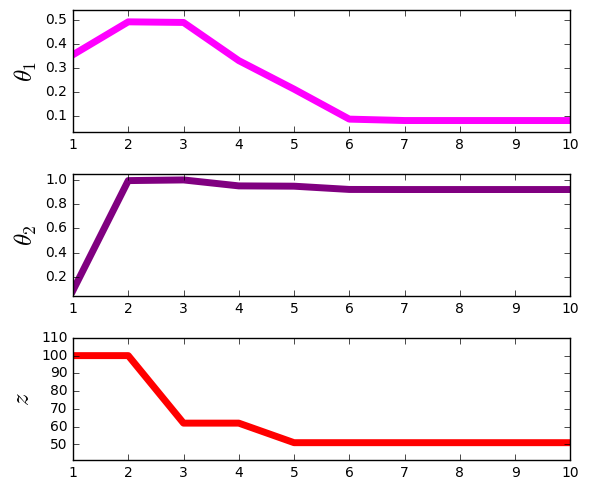

In [420]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import gridspec

theta1 = 0.1
theta2 = 0.9
z = 50
l = 100
Y = np.hstack((np.random.binomial(n=1, p=theta1, size=z), np.random.binomial(n=1, p=theta2, size=l-z)))
res = em(Y)

iters = np.arange(10) + 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 5))
ax0, ax1, ax2 = axes.flatten()

colors = ['magenta', 'purple', 'red']
ax0.set_ylabel(r'$\theta_1$', fontsize=18)
ax0.set_ylim([min(res[1]) - 0.05, max(res[1]) + 0.05])
ax0.plot(iters, res[1], color='magenta', lw=5)

ax1.set_ylabel(r'$\theta_2$', fontsize=18)
ax1.set_ylim([min(res[2]) - 0.05, max(res[2]) + 0.05])
ax1.plot(iters, res[2], color='purple', lw=5)

ax2.set_ylabel(r'$z$', fontsize=18)
ax2.set_ylim([min(res[3]) - 10, max(res[3]) + 10])
ax2.plot(iters, res[3], color='red', lw=5)

fig.tight_layout()
plt.show()

4\. **(0.5 балла)** Какой функционал оптимизирует ЕМ-алгоритм? 

Ответ: ЕМ-алгоритм оптимизирует матожидание логарифма правдоподобия: 
$\mathbb{E}_{P(z,|Y, \Theta)} \log P(Y, z|\Theta)$

Постройте график зависимости этого функционала от номера итерации ЕМ-алгоритма. Ведёт ли эта величина себя монотонно?

Ответ: величина монотонно возрастает от итерации, сходимость наблюдается к 6 итерации. График ниже.

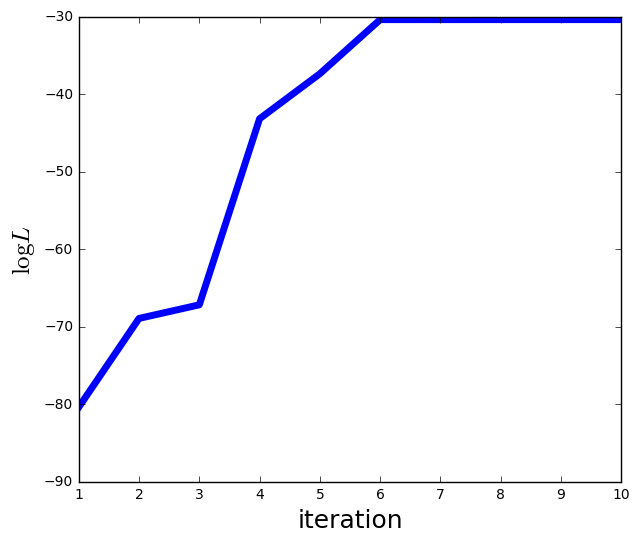

In [421]:
plt.figure(figsize=(7, 6))
plt.plot(iters, res[0], color='blue', lw=5)
plt.xlabel('iteration', fontsize=18)
plt.ylabel(r'$\log L$', fontsize=18)
plt.show()

5\. **(0.5 балла)** Повторите эксперимент аналогично п.3 1000 раз для $\theta_1 = 0.49$, $\theta_2 = 0.51, z=500, l=550$. Оцените RMSE для между истинным значением и оценками, полученными в результате экспериментов, для $\theta_1, \theta_2, z$, а также постройте гистограмму полученных в результате экспериментов остатков для этих величин.

,theta1,theta2,z
RMSE,0.061436,0.22415,327.108108


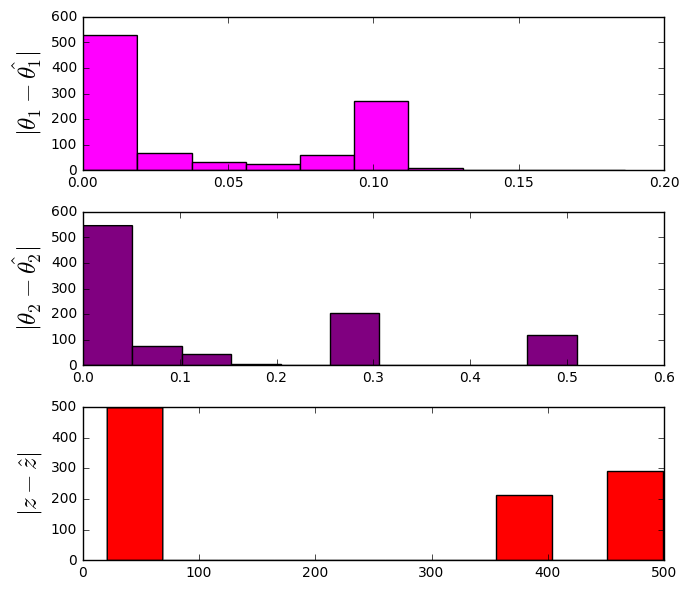

In [440]:
from math import sqrt
import pandas as pd
from IPython.display import display

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

theta1 = 0.49
theta2 = 0.51
z = 500
l = 550
Y = np.hstack((np.random.binomial(n=1, p=theta1, size=z), np.random.binomial(n=1, p=theta2, size=l-z)))

N = 1000
theta1_iters = theta1 * np.ones(N)
theta1_pred_iters = np.zeros(N)

theta2_iters = theta2 * np.ones(N)
theta2_pred_iters = np.zeros(N)

z_iters = z * np.ones(N)
z_pred_iters = np.zeros(N)

for i in range(N):
    res = em(Y)
    theta1_pred_iters[i] = res[1][-1]
    theta2_pred_iters[i] = res[2][-1]
    z_pred_iters[i] = res[3][-1]
    

display(pd.DataFrame({'RMSE': {'theta1': rmse(theta1_iters, theta1_pred_iters), 
                       'theta2' : rmse(theta2_iters, theta2_pred_iters),
                       'z' : rmse(z_iters, z_pred_iters)
                      }
             }).T)


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 6))
ax0, ax1, ax2 = axes.flatten()

colors = ['magenta', 'purple', 'red']
ax0.hist(np.abs(theta1_iters - theta1_pred_iters), histtype='bar', color=colors[0])
ax0.set_ylabel(r'$|\theta_1 - \hat{\theta_1}|$', fontsize=18)

ax1.hist(np.abs(theta2_iters - theta2_pred_iters), histtype='bar', color=colors[1])
ax1.set_ylabel(r'$|\theta_2 - \hat{\theta_2}|$', fontsize=18)

ax2.hist(np.abs(z_iters - z_pred_iters), histtype='bar', color=colors[2])
ax2.set_ylabel(r'$|z - \hat{z}|$', fontsize=18)

fig.tight_layout()
plt.show()

## Смесь нормальных распределений

Пусть данные описываются смесью многомерных нормальных распределений:
$$p(x_i|\Theta) = \sum_{k=1}^K \pi_k p(x_i|\theta_k) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k).$$

В рамках данной части задания вам необходимо реализовать ЕМ-алгоритм для нахождения параметров указанного распределения (формулы для данной модели были выведены в материалах [семинара 15](https://github.com/esokolov/ml-course-hse/blob/master/2016-spring/seminars/sem15-EM.pdf)) и применить его для решения задачи классификации на датасете MNIST. Чтобы применение ЕМ-алгоритма к датасету MNIST было осмысленным, мы воспользуемся методом понижения размерности t-SNE.

7\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — итоговые оценки параметров распределения и значения скрытых переменных. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [7]:
EPS = 1e-12
def estimate_gaussian_parameters(X, resp, reg_cov):
    nk = resp.sum(axis=0) + EPS
    mu = np.dot(resp.T, X) / nk[:, np.newaxis]
    n_components, n_features = mu.shape
    sigma = np.empty((n_components, n_features, n_features))
    for k in range(n_components):
        diff = X - mu[k]
        sigma[k] = np.dot(resp[:, k] * diff.T, diff) / nk[k]
        sigma[k].flat[::n_features + 1] += reg_cov
    return nk, mu, sigma

def estimate_log_gaussian_prob(X, mu, sigma):
    N = X.shape[0]
    D = X.shape[1]

    inv = np.linalg.inv(sigma)
    _, logdet = np.linalg.slogdet(sigma)
    const = D * np.log(2 * np.pi) + logdet
    X_mu = X - mu
    right_part = np.dot(X_mu, inv.T)
    return -0.5 * (const + (X_mu * right_part).sum(axis=1))

def logsumexp(arr):
    amax = arr.max(axis=0)
    out = np.log(np.sum(np.exp(arr - amax), axis=0))
    out += amax
    return out

def e_step(X, w, mu, sigma):
    mixture_prob = []
    for mu_k, sigma_k in zip(mu, sigma):
        mixture_prob.append(estimate_log_gaussian_prob(X, mu_k, sigma_k))
        
    weighted_log_prob = np.array(mixture_prob) + np.log(w)[:, np.newaxis]
    log_prob_norm = logsumexp(weighted_log_prob)
    log_resp = weighted_log_prob - log_prob_norm
    return np.sum(log_prob_norm), log_resp.T

def m_step(X, log_resp, reg_cov):
    w, mu, sigma = estimate_gaussian_parameters(X, np.exp(log_resp), reg_cov)
    w /= X.shape[0]
    return w, mu, sigma

def initialize_parameters(X, K, reg_cov):
    n_samples = X.shape[0]
    resp = np.random.rand(n_samples, K)
    resp /= resp.sum(axis=1)[:, np.newaxis]
    w, mu, sigma = estimate_gaussian_parameters(X, resp, reg_cov)
    w /= n_samples
    return w, mu, sigma
    
def em(X, K, max_iter=100, reg_cov=1e-8):
    w, mu, sigma = initialize_parameters(X, K, reg_cov)
    log_likelyhood_curve = []
    for i in range(max_iter):
        log_prob_norm, log_resp = e_step(X, w, mu, sigma)
        log_likelyhood_curve.append(log_prob_norm)
        
        w, mu, sigma = m_step(X, log_resp, reg_cov)
    return w, mu, sigma, np.argmax(log_resp, axis=1), log_likelyhood_curve

8\. **(1 балл)** Загрузите признаковые описания и значения целевой переменной для 2000 случайных объектов из обучающей выборки датасета [MNIST](http://yann.lecun.com/exdb/mnist/) и сохраните их в соответствующие переменные.

In [3]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
idxs = np.random.randint(mnist.data.shape[0], size=(2000, ))
data = np.float64(mnist.data[idxs])
target = np.int64(mnist.target[idxs])

9\. **(0.5 балла)** Визуализируйте полученную выборку на плоскости при помощи t-SNE, используя различные цвета для объектов различных классов.

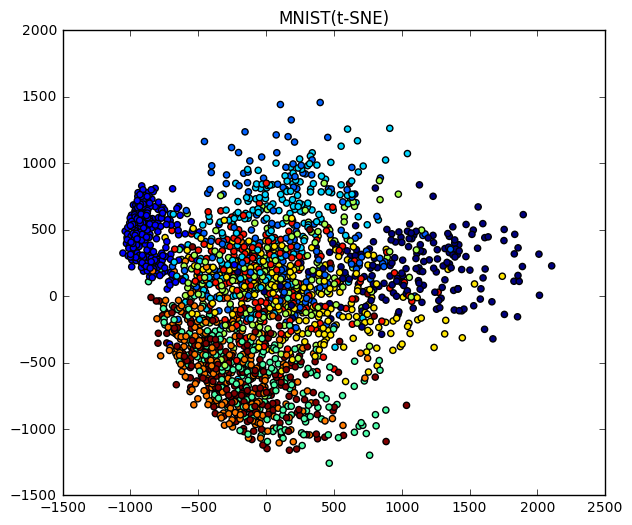

In [25]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, init='pca', random_state=241)
data_tsne = tsne.fit_transform(data)
plt.figure(figsize=(7, 6))
plt.title('MNIST(t-SNE)')
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=target)
plt.show()

10\. **(0.5 балла)** Для выборки из п. 8 понизьте количество признаков до 3 при помощи t-SNE, потом разбейте ее на 2 части в соотношении 7:3 и обучите параметры смеси на бОльшей части с помощью ЕМ алгоритма для $K=10$ компонент

In [9]:
from sklearn.cross_validation import train_test_split
tsne = TSNE(n_components=3, random_state=241)
data_tsne = tsne.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_tsne, target, test_size=0.3, random_state=241)
K = 10
w, mu, sigma, comps_train, ll_curve = em(X_train, K)
log_prob_norm, log_resp = e_step(X_test, w, mu, sigma)
comps_test = np.argmax(log_resp, axis=1)

Полученное разделение выборки на компоненты можно использовать для построения классификатора, предсказывающего изображенную цифру. Для этого будем считать прогнозом для всех объектов $k$-ой компоненты самую частую истинную метку среди объектов этой компоненты:

$$a(x_i) = \arg \max_{k \in \{1, \dots, 10\}} \sum_{j=1}^l [z_j = z_i] [y_j = k],$$

где $z_i$ — вектор скрытых переменных для объекта выборки $x_i$.

11\. **(0.5 балла)**  Выведите значение accuracy на обучающей и тестовой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки.

In [190]:
from sklearn.metrics import accuracy_score

def predict(comps_train, comps_test, y_train, y_test):
    y_train_pred = np.ones(y_train.shape[0], dtype=int)
    y_test_pred = np.ones(y_test.shape[0], dtype=int)
    for i in np.unique(comps_train):
        y_train_pred[comps_train == i] = np.argmax(np.bincount(y_train[comps_train == i]))
    for i in np.unique(comps_test):
        if i in comps_train:
            y_test_pred[comps_test == i] *= y_train_pred[comps_train == i][0]
        else:
            y_test_pred[comps_test == i] *= 0.0 #np.random.randint(1, 10, 1)[0]
    return y_train_pred, y_test_pred

y_train_pred, y_test_pred = predict(comps_train, comps_test, y_train, y_test)
display(pd.DataFrame({'Accuracy':
                {
                'Train': accuracy_score(y_train, y_train_pred),
                'Test' : accuracy_score(y_test, y_test_pred)
                }
                     }).T)

,Test,Train
Accuracy,0.581667,0.605714


12\. **(1 балл)** Постройте график зависимости значения accuracy на обучающей и тестовой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки от числа компонент $K$, фигурирующего в ЕМ-алгоритме. Не забудьте попробовать число компонент $K \geq 10$ (при этом аргмаксимум, конечно, нужно брать по $k \in \{1, \dots, 10\}$).

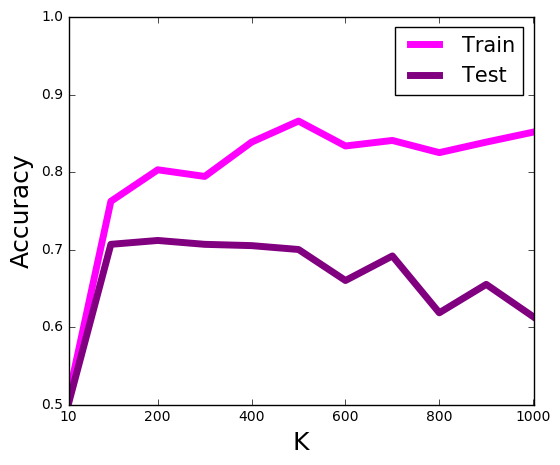

In [247]:
Klist = [10] + list(range(100, 1100, 100))
acc_train = []
acc_test = []
for K in Klist:
    w, mu, sigma, comps_train, ll_curve = em(X_train, K)
    log_prob_norm, log_resp = e_step(X_test, w, mu, sigma)
    comps_test = np.argmax(log_resp, axis=1)
    y_train_pred, y_test_pred = predict(comps_train, comps_test, y_train, y_test)
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))
plt.figure(figsize=(6, 5))
plt.plot(Klist, acc_train, color='magenta', lw=5)
plt.plot(Klist, acc_test, color='purple', lw=5)
plt.xlabel('K', fontsize=18)
plt.xticks(list(plt.xticks()[0][1:]) + [10])
plt.ylabel('Accuracy', fontsize=18)
plt.xlim([10, max(Klist) + 1])
plt.ylim([0.5, 1.0])
plt.legend(['Train', 'Test'], loc = 'best', fontsize = 15)
plt.show()

Вставьте одну из ваших любимых цитат преподавателей

Несовместны, если совместить нельзя. Кудрявцев А. А.